In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [6]:
# plot speed per condition will be interesting to see and assess 

# 1. this block does this- callums idea for commenting 

    # A. do x


# keep condition of folder 
#for folder in directory(''):

# frame rate issues 

# account for different framerates 
frame_rates = {'agarose-day4-n2': 1, 'agarose-day4-n10': 1, 'agarose-day3-n2': 1, 'agarose-day3-n10': 1, 'food-day3-n2': 2, 'food-day3-n10': 2, 'food-day4-n2': 2, 'food-day3-n10': 2}
pixel_to_cm_rates = {'agarose-day4-n2': (9/1040), 'agarose-day4-n10': (9/1040), 'agarose-day3-n2': (9/1040), 'agarose-day3-n10': (9/1040), 'food-day3-n2': (9/950), 'food-day3-n10': (9/950), 'food-day4-n2': (9/950), 'food-day4-n10': (9/950)}

speeds = []
condition = []


directory_path = '/Volumes/lab-windingm/home/users/cochral/AttractionRig/Videos/N Free Roaming Larvae/SLEAP-CSV'


for condition_folder in os.listdir(directory_path):

    path = os.path.join(directory_path, condition_folder)

    # Check if the folder is indeed a directory
    if os.path.join(path):
        
        # iterate over all the files in the folder
        for file in os.listdir(path):

            if file.endswith('csv'): # only csv files
                
                
                file_path = os.path.join(path, file)
                
                
                df = pd.read_csv(file_path)

                frame_rate = frame_rates[condition_folder]
                pixel_to_cm = pixel_to_cm_rates[condition_folder] # conversion factor- different in different videos :/ 

                # to calculate the speeds you want individual tracks
                    # iterate over the tracks per video 
                    # for each track calculate all of its speeds 
                

                # sort the tracks first and then within the tracks sort by the frames
                df.sort_values(by=['track', 'frame_idx'], inplace=True)


                # calcule the speed of each tracked object accross frames

                for track in df['track'].unique():

                    individual_track = df[df['track'] == track] # filter to ensure the track is unique 

                    # the np.diff function calculates the difference between consecutive elements in an array
                      # each frame it will calculate the difference between the x and y coordinates 
                      # axis=0 - the difference between consecutive rows
                    
                    # axis 0 referes to the rows, such that operation is performed along the rows- so down two specified columns here

                    track_differences = np.diff(individual_track[['body.x', 'body.y']], axis=0)

                    track_differences *= pixel_to_cm 

                    # np.diff gives us an array where each element is a vector of the form [dx, dy], 
                    # representing the object's displacement in the x-direction (dx) and y-direction (dy) between two consecutive frames
                    # need to calculate the magnitude of this vector to find out how far the object has moved irrespective of the direction

                    # np.linalg.norm calculates the Euclidean distance between each point 
                    #  magnitude of this vector to find out how far the object has moved irrespective of the direction

                    # axis 1 because this is a column operation but occuring accross each row 
                    # axis 1 refers to the column - so for each row in the column an operation occurs 

                    # frame rate to convert distance to speed

                    track_speeds = np.linalg.norm(track_differences, axis=1) * frame_rate



                    speeds.append(track_speeds)
                    
                    # extend the condition list with the current condition_folder repeated as many times as there are speed values.
                    
                    condition.append([condition_folder] * len(track_speeds))
                
            else:
                continue 


df_speeds = pd.DataFrame({'condition': condition, 'speed': speeds})
# it seems that the condition column contains lists, and the speed column also contains lists
#  pandas .explode() method, which will take each element in a list and create a new row for it, copying the index of the original row.
df_speeds = df_speeds.explode('condition').explode('speed')

# now has separate rows for each element of the lists
df_speeds

,condition,speed
0,agarose-day3-n10,0.09818
0,agarose-day3-n10,0.071356
0,agarose-day3-n10,0.069661
0,agarose-day3-n10,0.03547
0,agarose-day3-n10,0.074439
...,...,...
148,agarose-day4-n10,0.000176
148,agarose-day4-n10,0.000776
148,agarose-day4-n10,0.003605
148,agarose-day4-n10,0.029559


In [15]:
# You can now convert the 'speed' column to numeric if it's not already
df_speeds['speed'] = pd.to_numeric(df_speeds['speed'])

df_speeds

,condition,speed
0,agarose-day3-n10,0.098180
0,agarose-day3-n10,0.071356
0,agarose-day3-n10,0.069661
0,agarose-day3-n10,0.035470
0,agarose-day3-n10,0.074439
...,...,...
148,agarose-day4-n10,0.000176
148,agarose-day4-n10,0.000776
148,agarose-day4-n10,0.003605
148,agarose-day4-n10,0.029559


In [18]:
df_speeds.shape

(67280177, 2)

In [27]:
# Assuming 'df_speeds' is your DataFrame with a 'condition' and 'speed' column
grouped_stats = df_speeds.groupby('condition')['speed'].describe()

# This will show you the summary statistics for the 'speed' column, grouped by each 'condition'
print(grouped_stats)


                       count      mean       std       min       25%  \
condition                                                              
agarose-day3-n10   5843111.0  0.057548  0.196456  0.000008  0.032681   
agarose-day4-n10  29658392.0  0.090307  0.359402  0.000004  0.033996   
agarose-day4-n2    6260209.0  0.148722  0.689929  0.000004  0.036066   
food-day3-n2       8012094.0  0.096427  0.449799  0.000028  0.056851   
food-day4-n2      17506370.0  0.337261  1.439961  0.000006  0.013032   

                       50%       75%        max  
condition                                        
agarose-day3-n10  0.045818  0.067019   8.404623  
agarose-day4-n10  0.068372  0.094431   8.929731  
agarose-day4-n2   0.070420  0.095752   8.706847  
food-day3-n2      0.076477  0.110665  15.289071  
food-day4-n2      0.090439  0.142959  15.288096  


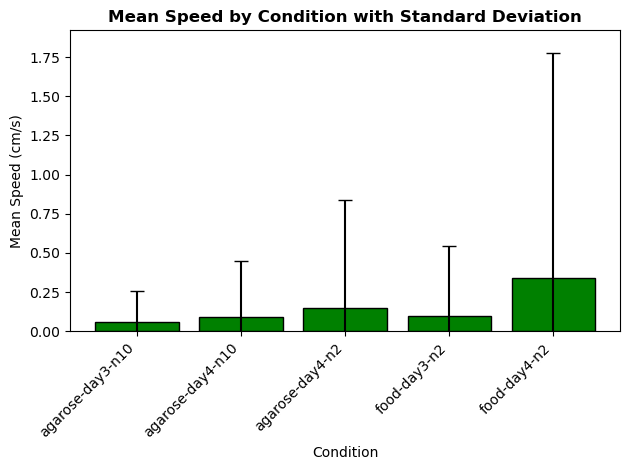

In [38]:
plt.bar(df_summary_stats['condition'], df_summary_stats['mean'], yerr=df_summary_stats['std'], capsize=5, color='green', edgecolor='black')

# Set the plot title and labels
plt.title('Mean Speed by Condition with Standard Deviation', fontweight='bold')
plt.xlabel('Condition')
plt.ylabel('Mean Speed (cm/s)')


plt.xticks(rotation=45, ha="right")
plt.ylim(bottom=0)


plt.tight_layout()

plt.savefig('/Users/cochral/repos/behavioural-analysis/plots/attraction-rig/mean_speed_per_condition', dpi=300, bbox_inches='tight')

plt.show()

KeyboardInterrupt: 

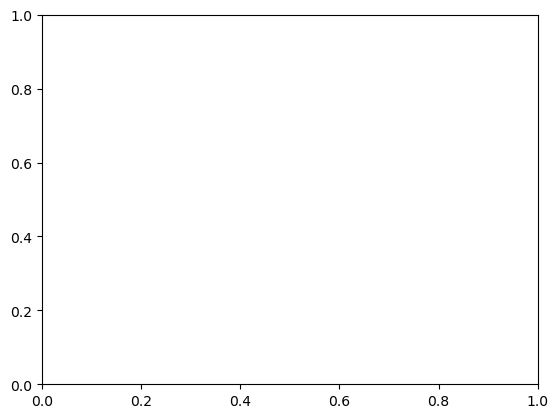

In [29]:
sns.boxplot(data=df_speeds, x='condition', y='speed', palette='viridis', edgecolor='black')

plt.title('Speed Distribution by Condition', fontweight='bold')
plt.xlabel('Condition', fontweight='bold')
plt.ylabel('Speed (units)', fontweight='bold')
plt.xticks(rotation=45)  

plt.tight_layout()

plt.show()

# take over 3m- shd loop through it 

np.diff: This function calculates the difference between consecutive elements in an array. When you apply np.diff to the x and y coordinates, it gives you the change in position (displacement) for each track from one frame to the next. This is essentially calculating the "delta x" and "delta y" for each move.

np.linalg.norm: This function calculates the Euclidean norm (also known as the L2 norm or the magnitude of a vector). When you apply np.linalg.norm to the differences obtained from np.diff, you get the straight-line distance (displacement magnitude) that each track moved from one frame to the next.

cdist is used for computing pairwise distances between two sets of points, usually between different groups of points. It's not intended for calculating sequential displacements, which is what you need when you're trying to find how far each track has moved from one frame to the next.

In summary, np.diff is used to calculate the component-wise displacement between frames, and np.linalg.norm is used to turn these component-wise displacements into scalar magnitudes of displacement. This scalar magnitude of displacement per frame is then converted into speed by considering the time between frames given by the frame rate.

axis=0: Operations are performed along the rows. For a 2D array (or DataFrame), this means the function will operate down each column.

Example: In a DataFrame, applying a sum function with axis=0 will sum down each column, giving the total for each column.

axis=1: Operations are performed along the columns. For a 2D array (or DataFrame), this means the function will operate across each row.

Example: In a DataFrame, applying a sum function with axis=1 will sum across each row, giving the total for each row.

This can sometimes be confusing because "operating along rows" (axis 0) means performing the operation in a column-wise manner and vice versa. It's often helpful to think in terms of what is being 'held constant' in the operation: for axis=0, each column is a constant unit during the operation, and for axis=1, each row is.